# IRIS multi class with artificial neural network using tensor flow

In [21]:
#import libraries
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [22]:
df = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/IRIS/IRIS.csv", encoding = "ISO-8859-1", error_bad_lines=False)

In [23]:
train = df[['Sepal length', 'Sepal Width', 'Petal length', 'Petal Width', 'Class']]
train.shape

(100, 5)

In [24]:
train_x = df[['Sepal length', 'Sepal Width', 'Petal length', 'Petal Width']].values

In [25]:
#Label encode category outcomr class to continuous outcomr class 

le = LabelEncoder()
train['Class'] = le.fit_transform(train.Class)

/Users/suvojitdutta/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)
print (rng)

In [27]:
# Take a split size of 70:30 for train set vs validation set

split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train.Class.values[:split_size], train.Class.values[split_size:]

In [28]:
# define some helper functions, which we use later on, in our programs

def dense_to_one_hot(labels_dense, num_classes=3):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    np.array(map(str, index_offset))
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot

def encode_labels(labels):
    """encode category labels to continuous labels"""
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    labels_one_hot_en = dense_to_one_hot(labels)
    return labels_one_hot_en
    
def preproc(unclean_batch):
    """Convert values to range 0-1"""
    temp_batch = unclean_batch / unclean_batch.max()
    
    return temp_batch

def batch_creator(batch_size, dataset_length, dataset_name):
    
    """Create batch with random samples and return appropriate format"""
    batch_mask = rng.choice(dataset_length, batch_size)
    
    batch_x = eval(dataset_name + '_x')[[batch_mask]].reshape(-1, 4)
    
    batch_x = preproc(batch_x)
    
    if dataset_name == 'train':
        batch_y = eval(dataset_name).ix[batch_mask, 'Class'].values
        batch_y = dense_to_one_hot(batch_y)
        
    return batch_x, batch_y

In [29]:
#Start building the computation graph by creating nodes for the input images and target output classes.
x = tf.placeholder(tf.float32, shape=[None, 4])
y_ = tf.placeholder(tf.float32, shape=[None, 3])

In [30]:
# set remaining variables
epochs = 18
batch_size = 20
learning_rate = 0.5

In [31]:
# Define the weights W and biases b for our model.  Initialize with zeros
W = tf.Variable(tf.zeros([4,3]))
b = tf.Variable(tf.zeros([3]))

In [32]:
# Implement our regression model.
y = tf.matmul(x,W) + b

In [33]:
# Here, loss function is the cross-entropy between the target and the softmax activation function applied to the model's prediction.
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

In [34]:
# Use steepest gradient descent, with a step length (learning_rate) of 0.5, to descend the cross entropy.
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [35]:
#Initialize tensorflow variables and placeholders
init = tf.initialize_all_variables()

In [36]:
# Create a session, and run neural network in the session. Also validate the model accuracy on validation set that is created

with tf.Session() as sess:
    # create initialized variables
    sess.run(init)
    
    ### for each epoch, do:
    ###   for each batch, do:
    ###     create pre-processed batch
    ###     run optimizer by feeding batch
    ###     find cost and reiterate to minimize
    
    Cost = []
    for epoch in range(epochs):
        avg_cost = 0
        total_batch = int(train.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = batch_creator(batch_size, train_x.shape[0], 'train')
            _, c = sess.run([optimizer, cost], feed_dict = {x: batch_x, y_: batch_y})
            
            avg_cost += c / total_batch
            
        print ("Epoch:", (epoch+1), "cost =", "{:.5f}".format(avg_cost))
        Cost.append(avg_cost)
    
    print ("\nTraining complete!")
    
    # find predictions on val set
    pred_temp = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(pred_temp, "float"))
    
    val_x = preproc(val_x.reshape(-1, 4))
    
    val_y = dense_to_one_hot(val_y)
    
    #print ("Validation Accuracy:", accuracy.eval({x: val_x.reshape(-1, 4), y_: dense_to_one_hot(val_y)}))
    print ("Validation Accuracy:", accuracy.eval({x: val_x, y_: val_y}))
    
    sess.run(y)
    #Test the model
    predict = tf.argmax(y, 1)
    #pred = predict.eval({x: test_x.reshape(-1, 100)})
    pred = predict.eval({x: preproc(train_x.reshape(-1, 4))})

Epoch: 1 cost = 0.98385
Epoch: 2 cost = 0.85498
Epoch: 3 cost = 0.66714
Epoch: 4 cost = 0.88543
Epoch: 5 cost = 0.76488
Epoch: 6 cost = 0.64956
Epoch: 7 cost = 0.65663
Epoch: 8 cost = 0.68001
Epoch: 9 cost = 0.57965
Epoch: 10 cost = 0.49362
Epoch: 11 cost = 0.48469
Epoch: 12 cost = 0.58756
Epoch: 13 cost = 0.57532
Epoch: 14 cost = 0.54060
Epoch: 15 cost = 0.56375
Epoch: 16 cost = 0.47491
Epoch: 17 cost = 0.64864
Epoch: 18 cost = 0.37361

Training complete!
Validation Accuracy: 0.0



The variation of cost during model iterations is as following:


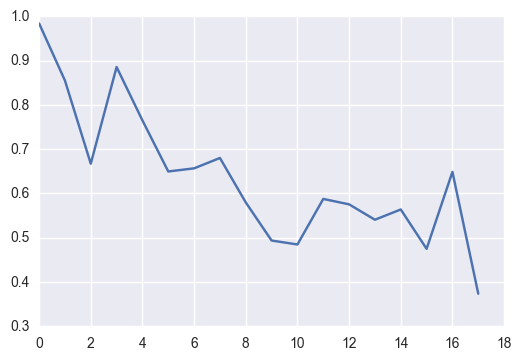

In [38]:
#Plot the flow of cost:
print ('\nThe variation of cost during model iterations is as following:')
%matplotlib inline
plt.plot(Cost)

In [325]:
print (pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [326]:
outcome = le.inverse_transform(pred)

In [327]:
print (outcome)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']
